In [1]:
#hide
!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 6.6 MB/s 
     |████████████████████████████████| 56 kB 6.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.661806,0.464376,0.851300,0.148700,06:16


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.138211,0.071769,0.976000,0.024000,11:57
1,0.063527,0.046649,0.986500,0.013500,12:01
2,0.030984,0.030401,0.990400,0.009600,12:07
3,0.017347,0.024900,0.991900,0.008100,12:11


In [4]:
images = get_image_files(path/'testing')
img = PILImage.create(images[4432])
img

In [5]:
lbl, _ , _ = learn.predict(img)
lbl

'0'

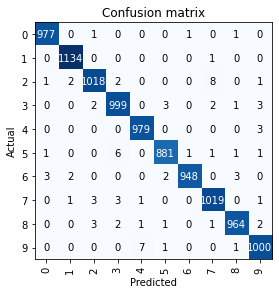

In [6]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

In [7]:
learn.export()

In [8]:
from google.colab import files

In [20]:
files.download('/root/.fastai/data/mnist_png/export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
path

Path('/root/.fastai/data/mnist_png')

In [19]:
ls /root/.fastai/data/mnist_png

export.pkl  testing/  training/
